<a href="https://colab.research.google.com/github/hiydavid/time-series/blob/main/notebooks/time_series_dynamic_time_warping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Time Warping

---

Demonstrate why DTW works better as a clustering / simularity matching method compared to Euclidean distance or Pearson correlation methods.

DTW Example: 

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ab/Dynamic_time_warping.png">

***
## Load Libraries

In [1]:
# dtw-python
!pip install dtw-python

     |████████████████████████████████| 583kB 27.4MB/s 


In [21]:
# load libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from math import sqrt
from dtw import *
from pylab import rcParams

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

***
## Generate Time Series

First, I created three separate time series, with two of them using sine function, and one as a flatish time series. Intuitively, the two "wavey" time series should be more similar to each other than with the flat line.

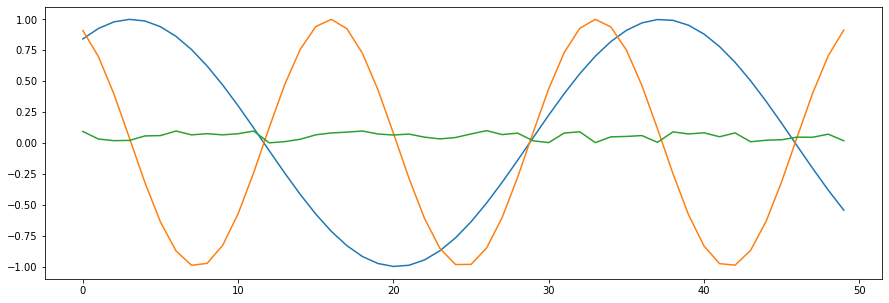

In [4]:
# Create three time series for demonstration
np.random.seed(12345)
ts1 = np.sin(np.linspace(1, 10))        # wavey ts 1
ts2 = np.sin(2 * np.linspace(1, 10))    # wavey ts 2
ts3 = np.zeros((50,))
ts3 = ts3 + (np.random.random(ts3.shape) / 10)

plt.plot(ts1)
plt.plot(ts2)
plt.plot(ts3)

---
# Using Euclidean Distance

Here, I demonstrate that if I use Euclidean distance as a way to cluster, we would see that the two wavey time series are closer to the flat line (in terms of distance) than they are to each other, which does not make intuitive sense.

In [5]:
# Calculate Euclidean distance between ts1 and ts2
np.sqrt(np.sum(np.square(ts1 - ts2)))

7.3897194681883756

In [6]:
# Calculate Euclidean distance between ts1 and ts3
np.sqrt(np.sum(np.square(ts1 - ts3)))

4.955200046352806

In [7]:
# Calculate Euclidean distance between ts2 and ts3
np.sqrt(np.sum(np.square(ts2 - ts3)))

4.996509607866343

---
# Using Pearson Correlations

Using correlations also does not yield ideal results, as it shows that ts1 is just as (negatively) correalted with ts2 as it is with ts3. So this metric also does not make intuitive sense.

In [8]:
# Calculate correlation between ts1 and ts2
pearsonr(ts1, ts2)

(-0.10087714894729656, 0.485772279067736)

In [9]:
# Calculate correlation between ts1 and ts3
pearsonr(ts1, ts3)

(-0.1008408172883618, 0.48593020470185694)

In [10]:
# Calculate correlation between ts2 and ts3
pearsonr(ts2, ts3)

(-0.1344443129212071, 0.35192841293534644)

---
# Dynamic Time Warping From Scratch

DTW clearly shows that distance between ts1 and ts2 is closer than they are with ts3, which is the intuitive results we are looking for.

In [11]:
# DTW from scratch
def distDTW(ts1, ts2):
    DTW = np.full((len(ts1) + 1, len(ts2) + 1), 0, dtype = np.float32)
    DTW[:, 0] = np.inf
    DTW[0, :] = np.inf
    DTW[0, 0] = 0

    for i in range(1, len(ts1) + 1):
        for j in range(1, len(ts2) + 1):
            idx1 = i - 1 
            idx2 = j - 1
            
            dist = (ts1[idx1] - ts2[idx2]) ** 2
            min_preceding_dist = min(DTW[i-1, j], 
                                     DTW[i, j-1], 
                                     DTW[i-1, j-1])

            DTW[i, j] = dist + min_preceding_dist

    return sqrt(DTW[len(ts1), len(ts2)])

In [12]:
# Calculate DTW between ts1 and ts2
distDTW(ts1, ts2)

3.7609101849567645

In [13]:
# Calculate DTW between ts1 and ts3
distDTW(ts1, ts3)

4.659871171799555

In [14]:
# Calculate DTW between ts2 and ts3
distDTW(ts2, ts3)

4.696533653662598

---
# DTW Python

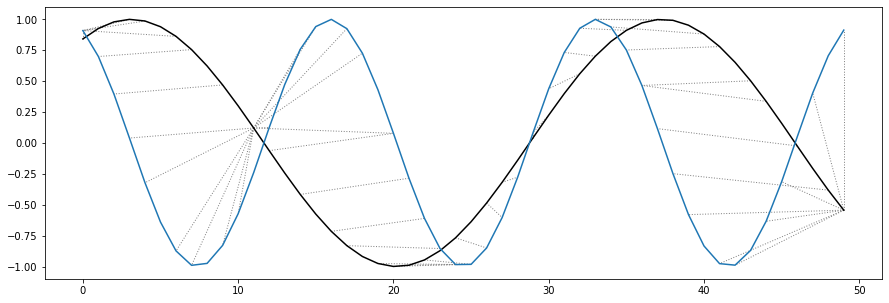

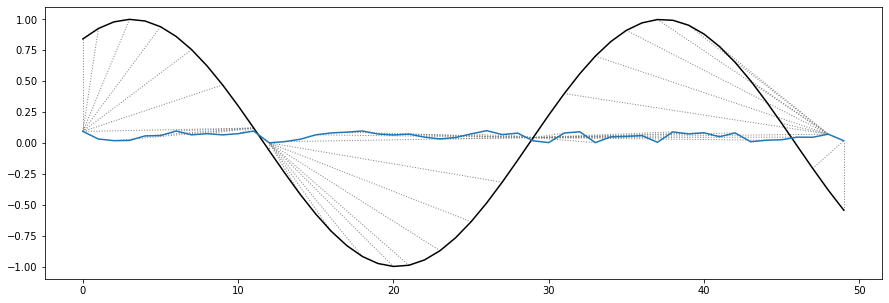

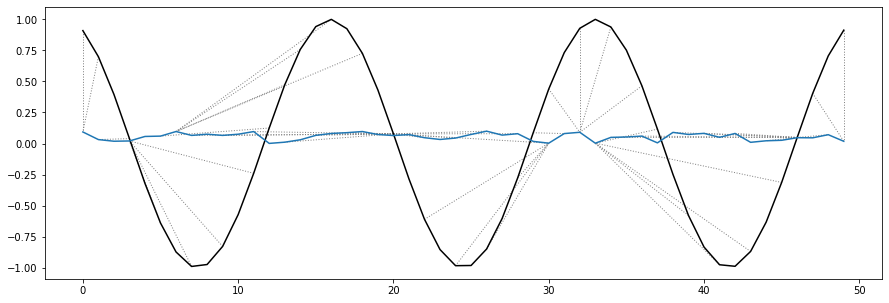

In [22]:
# user dtw-python library
test12 = dtw(ts1, ts2, keep_internals = True)
test13 = dtw(ts1, ts3, keep_internals = True)
test23 = dtw(ts2, ts3, keep_internals = True)

dtwPlot(test12, type = 'twoway')
dtwPlot(test13, type = 'twoway')
dtwPlot(test23, type = 'twoway')

In [23]:
# print dtw distance
print(f"DTW distance between ts1 and ts2: {test12.distance}")
print(f"DTW distance between ts1 and ts3: {test13.distance}")
print(f"DTW distance between ts2 and ts3: {test23.distance}")

DTW distance between ts1 and ts2: 20.791003353676633
DTW distance between ts1 and ts3: 31.308389133991668
DTW distance between ts2 and ts3: 30.81552123141527
